<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Cassificacao_Imagens_Alpaca_Colorida_Convolucao_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Segundo Projeto de redes neurais
#Processamento de Imagens
#Aluna: Thessa Fuzaro Mendes
#Data: 03/07/2021

In [2]:
from matplotlib import pyplot as plt  # para fazer graficos
import numpy as np
import pandas as pd #dataframe
import cv2  #biblioteca que trabalha com imagens
import random #gerar numeros aleatorios
import zipfile  #para trabalhar com arquivos zip
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization


In [3]:
#Importando os arquivos que estão no googledrive
!gdown --id 1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH

Downloading...
From: https://drive.google.com/uc?id=1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH
To: /content/Animals.zip
122MB [00:00, 237MB/s]


In [4]:
#Extraindo os arquivos zip e salvando na variavel x
Arq =['Animals.zip']  #importando os arquivos
Image_Size=300
Image_Name=[]  #lista em branco para armazenar os nomes das imagens
X_Original=[]  
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()    #extraindo os arquivos e colocando em uma lista unica com os nomes
  with zipfile.ZipFile(FILE, "r") as f:
      for Name in f.namelist():
          Image_Name.append(Name)
          X_Original.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size))) #redimensionando as imagens coloridas

In [5]:
#Recuperando o nome com 4 primeiras letras
Y_Names = []
for yy in Image_Name:
  Name = yy[0]+yy[1]+yy[2]+yy[3]
  Y_Names.append(Name)  


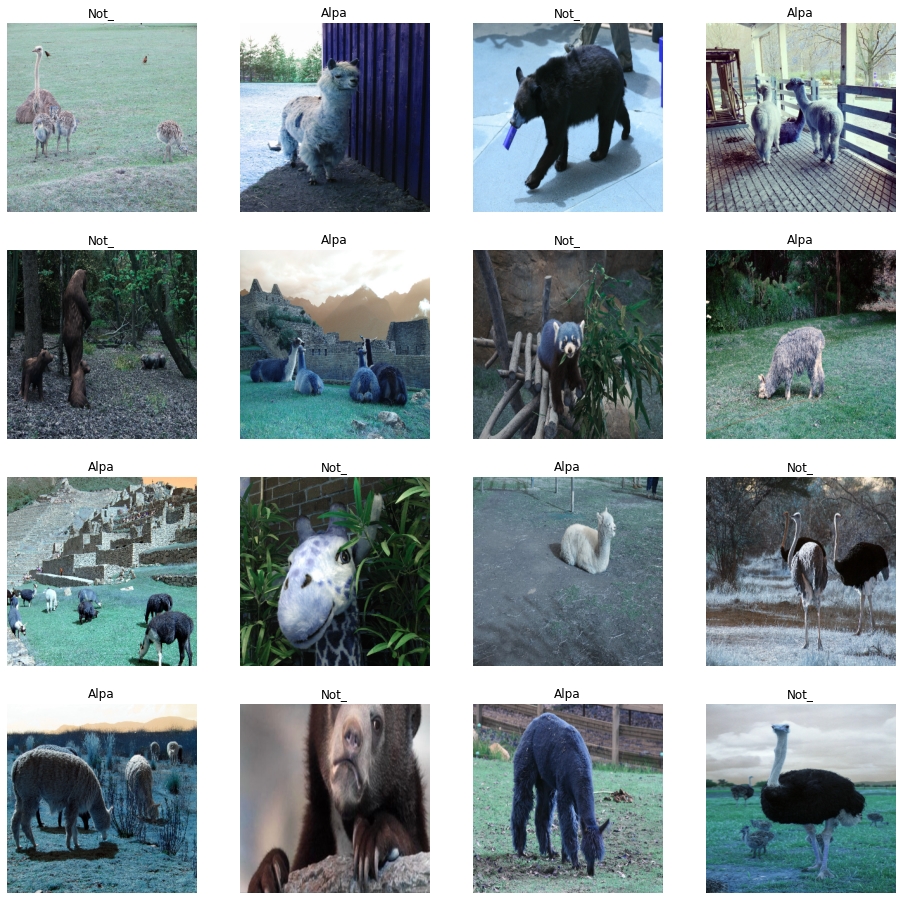

In [6]:
#Plotando algumas imagens coloridas com seus respectivos nomes (4 primeiras letras)
num = len(Y_Names)
plt.figure(figsize=(16,16))
for i in range (16) :
  ax = plt.subplot(4,4,i+1)
  kk = random.randrange(num)
  plt.imshow(X_Original[kk])
  plt.title(Y_Names[kk])
  plt.axis("off")

In [7]:
Unique_List = []      #gera uma lista com as classes únicas
for yy in Y_Names:
  if yy not in Unique_List:
    Unique_List.append(yy)

In [8]:
n = len(Unique_List)  #separa em classes ao inves de nome aparece o índice referente
Y = []
for yy in Y_Names:   #Loop com nome e armazena em y o nome dessas classes unicas com um vetor om os numeros 0, 1, 2,3
  for i in range(n):
    if(yy == Unique_List[i]):
      Y.append(i)

In [9]:
Unique_List

['Alpa', 'Not_']

In [10]:
DATASET_SIZE = len(Y_Names)   #tamanho da quantidade de fotos
Index = range(DATASET_SIZE) #Fez um índice 


In [11]:
#Separando os dados em 80% de treino e 20% de teste e misturando os dados
Index_Train, Index_Test= train_test_split(Index,test_size=0.40, shuffle=True, random_state=3)

In [12]:
#Carregando os dados de treino
X_Train = []  
Y_Train = []
for II in Index_Train:
  Name = Image_Name[II]
  X_Train.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size))) #Redimensionando os dados de treino
  Y_Train.append(Y[II])

In [13]:
#Carregando os dados de teste
X_Test= []
Y_Test = []
for II in Index_Test:
  Name = Image_Name[II]
  X_Test.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size))) #Redimensionando os dados de teste
  Y_Test.append(Y[II])

In [14]:
#Fazendo um idicador para reprocessar os dados mais tarde
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [15]:
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
K = len(set(Y_Train))
X_Train = X_Train.reshape(-1, Image_Size, Image_Size, 3) / 255.0 #escalonamento para imagens coloridas 
Y_Train = Y_Train.astype(np.int32)
Y_Train = ynindicator(Y_Train)

X_Test = np.array(X_Test )
Y_Test = np.array(Y_Test)
X_Test = X_Test.reshape(-1, Image_Size, Image_Size, 3) / 255.0
Y_Test = Y_Test.astype(np.int32)
Y_Test = ynindicator(Y_Test)   #reprocessando os dados que eram numeros em zero e 1 de acordo com a posição

In [16]:
#Montando a rede neural de convolução: 

model = Sequential()  #modelo em branco sequencial 

#Aplicando CNN
#Primeira camada de convolução
model.add(Conv2D(input_shape=(Image_Size, Image_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization()) #Normalização dos dados
model.add(Activation('relu'))  #Neuronios tipo relu porque é usual para imagens
model.add(MaxPooling2D())      #Camada Pooling
#Segunda camada de convolução
model.add(Conv2D(filters=62, kernel_size=(3, 3)))
model.add(BatchNormalization()) #Normalização dos dados
model.add(Activation('relu'))   #Neuronios tipo relu porque é usual para imagens
model.add(MaxPooling2D())       #Camada Pooling
#Camada densa
model.add(Flatten())            
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))      #Eliminando 20% dos neuronios com o drop out
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))      #número de saída da camada densa
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
# ulizando o model.fit para treinar e testar com as iteraçoes e analisando as métricas
r = model.fit(X_Train, Y_Train, validation_data = (X_Test,Y_Test), epochs=50, batch_size=50)
print("Returned:", r)

Epoch 1/50
4/4 [==============================] - 50s 913ms/step - loss: 100.7173 - accuracy: 0.5920 - val_loss: 16.3513 - val_accuracy: 0.5344
Epoch 2/50
4/4 [==============================] - 1s 230ms/step - loss: 66.9809 - accuracy: 0.5286 - val_loss: 30.8362 - val_accuracy: 0.5344
Epoch 3/50
4/4 [==============================] - 1s 236ms/step - loss: 67.7521 - accuracy: 0.6209 - val_loss: 15.3762 - val_accuracy: 0.5344
Epoch 4/50
4/4 [==============================] - 1s 222ms/step - loss: 41.9485 - accuracy: 0.5730 - val_loss: 3.4202 - val_accuracy: 0.5115
Epoch 5/50
4/4 [==============================] - 1s 230ms/step - loss: 25.9353 - accuracy: 0.6008 - val_loss: 21.4451 - val_accuracy: 0.5344
Epoch 6/50
4/4 [==============================] - 1s 274ms/step - loss: 23.3379 - accuracy: 0.6223 - val_loss: 9.7164 - val_accuracy: 0.4656
Epoch 7/50
4/4 [==============================] - 1s 268ms/step - loss: 15.4608 - accuracy: 0.6246 - val_loss: 13.1767 - val_accuracy: 0.5267
Epoch 

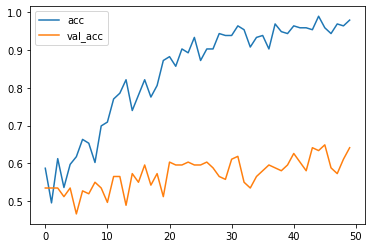

In [18]:
# plot some data
plt.plot(r.history['accuracy'], label='acc') #numero total de acertos pelo total de imagens
plt.plot(r.history['val_accuracy'], label='val_acc') #
plt.legend()
plt.show()

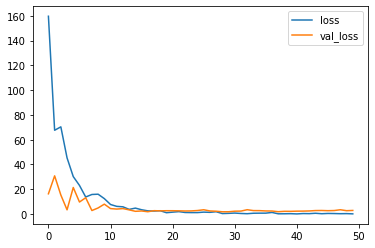

In [19]:
# plot some data
plt.plot(r.history['loss'], label='loss') #medida de erro 
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()